## Autoregression Model AR($p$)

In an autoregression model, we forecast using linear combination of past values of the variable. The term autoregression describes a regression of the variable against itself. An autoregression is tun against a set of lagged values of order $p$.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from statsmodels.tsa.ar_model import AR,ARResults

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('../../Data/uspopulation.csv',index_col=0,parse_dates=True)

In [5]:
df.index.freq = 'MS'
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


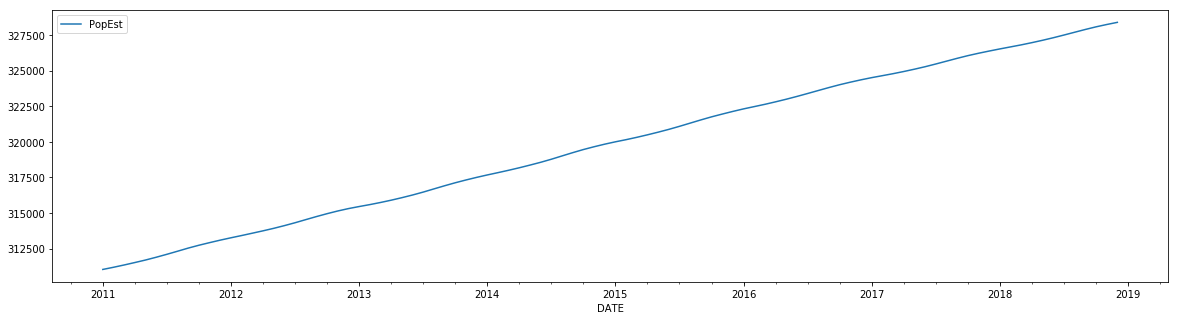

In [6]:
df.plot(figsize=(20,5));

In [7]:
len(df)

96

In [8]:
train = df.iloc[:84]
test = df.iloc[84:]

In [9]:
model = AR(train['PopEst'])

In [10]:
AR1FIT = model.fit(maxlag=1)

In [11]:
AR1FIT.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [12]:
start = len(train)
end = len(train)+len(test)-1

In [13]:
start

84

In [14]:
end

95

In [15]:
prediction1 = AR1FIT.predict(start,end)

In [16]:
prediction1 = prediction1.rename('AR(1) Predictions')

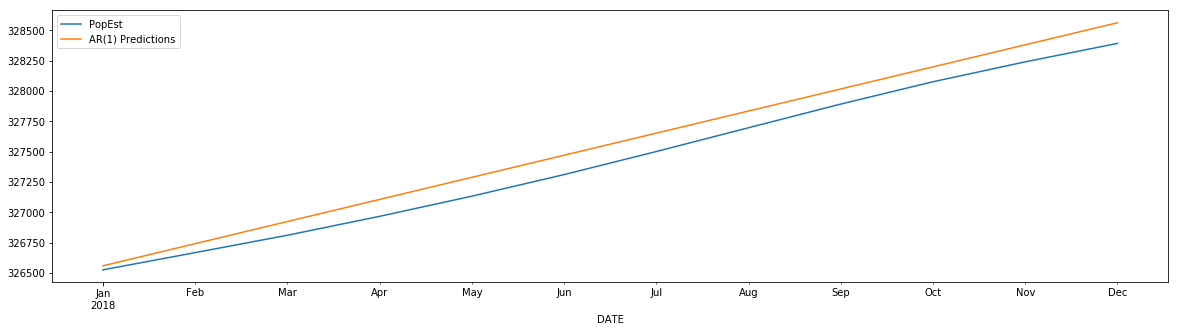

In [33]:
test.plot(figsize=(20,5))
prediction1.plot(legend=True);

In [18]:
AR2FIT = model.fit(maxlag=2)
AR2FIT.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [19]:
prediction2 = AR2FIT.predict(start,end)

In [20]:
prediction2 = prediction2.rename('AR(2) Predictions')

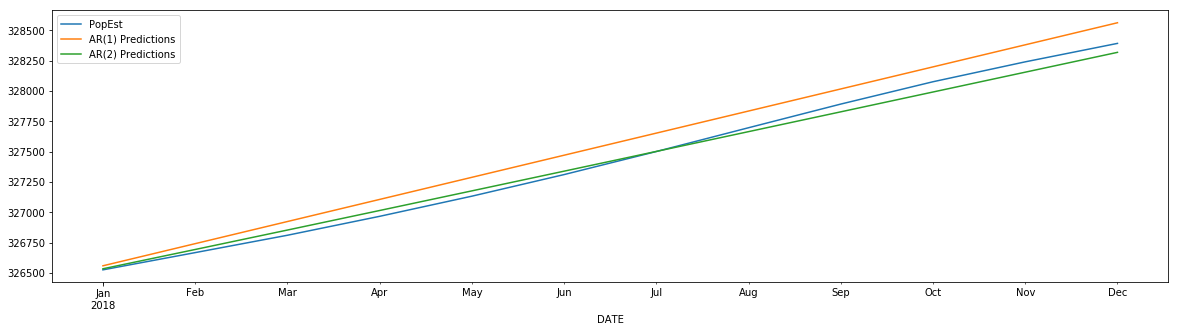

In [21]:
test.plot(figsize=(20,5))
prediction1.plot(legend=True)
prediction2.plot(legend=True);

In [22]:
ARfit = model.fit(ic='t-stat')

In [23]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
prediction12 = ARfit.predict(start,end)
prediction12 = prediction12.rename('AR(12) Predictions')

In [26]:
labels = ['AR1','AR2','AR12']
preds = [prediction1,prediction2,prediction12]

In [27]:
for i in range(3):
    error = mean_squared_error(test['PopEst'],preds[i])
    print(f'{labels[i]} MSE was :{error}')

AR1 MSE was :17449.714221708866
AR2 MSE was :2713.258645035927
AR12 MSE was :186.9743309574485


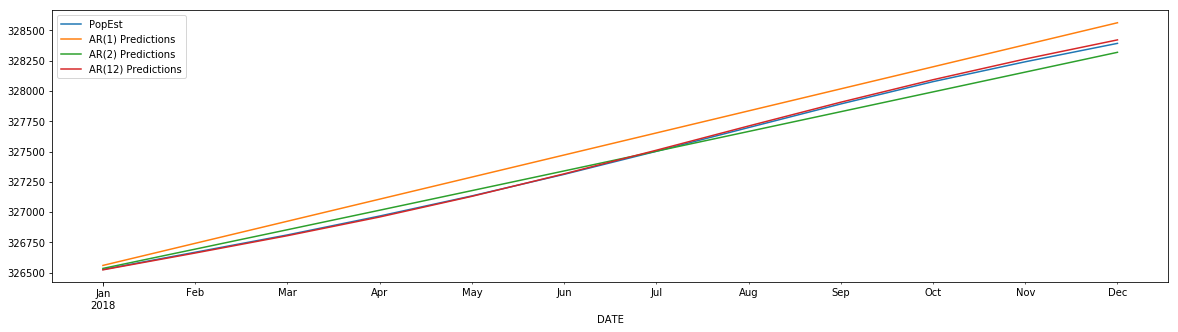

In [28]:
test.plot(figsize=(20,5))
prediction1.plot(legend=True)
prediction2.plot(legend=True);
prediction12.plot(legend=True);

In [29]:
model = AR(df['PopEst'])
ARfit = model.fit()
forcasted_values = ARfit.predict(start=len(df),end=len(df)+12).rename('Forecast')

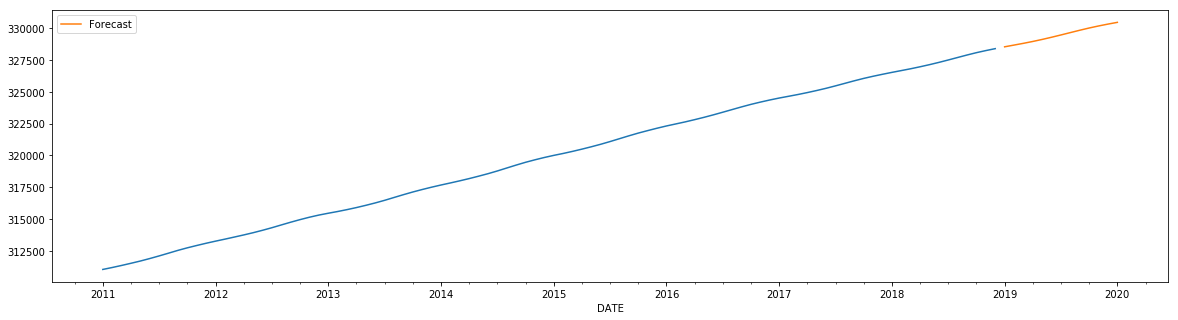

In [30]:
df['PopEst'].plot(figsize=(20,5))
forcasted_values.plot(legend=True)